# Домашнее задание №2
## Анализ данных о пользователях и покупках

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('default')
%matplotlib inline
# Графики отображаются под ячейкой с кодом, а не в отдельном окне.
# Не нужно вызывать plt.show() после каждого построения.

In [18]:
df = pd.read_csv('S02-hw-dataset.csv')

print(df.head())

print(df.info())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [19]:
# Базовые описательные статистики
print(df.describe())

print(df.describe(include='all'))

         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000
          user_id         age country  purchases      revenue
count   41.000000   39.000000      41  41.000000    41.000000
unique        NaN         NaN       5        NaN          NaN
top           NaN         NaN      RU        NaN          NaN
freq          NaN         NaN      13        NaN          NaN
mean    20.243902   36.512821     NaN   4.829268   820.048780
std     11.659289   18.304259     NaN   2.710189   613.127269
min      1.000000    5.000000     NaN  -1.000000     0.000000
25%     10.000000   24.0000

In [20]:
# Анализ пропусков в данных
missing_data = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)

missing_info = pd.DataFrame({
    'Пропущено': missing_data,
    'Процент пропусков': missing_percent
})
print(missing_info)

           Пропущено  Процент пропусков
user_id            0               0.00
age                2               4.88
country            0               0.00
purchases          0               0.00
revenue            0               0.00


In [21]:
# Проверка на дубликаты
duplicates = df.duplicated()
print(f"Найдено полных дубликатов: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("\nДублирующиеся строки:")
    print(df[duplicates])

Найдено полных дубликатов: 1

Дублирующиеся строки:
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


In [22]:
print(f"Минимальный возраст: {df['age'].min()}")
print(f"Максимальный возраст: {df['age'].max()}")

# Странные значения возраста
suspicious_age = df[(df['age'] < 18) | (df['age'] > 100)]
print(f"\nСтранные значения возраста (<18 или >100): {len(suspicious_age)}")
if len(suspicious_age) > 0:
    print(suspicious_age[['user_id', 'age', 'country']])

Минимальный возраст: 5.0
Максимальный возраст: 120.0

Странные значения возраста (<18 или >100): 2
    user_id    age country
5         6  120.0      FR
20       21    5.0      RU


In [23]:
print(f"Минимальное значение purchases: {df['purchases'].min()}")
print(f"Максимальное значение purchases: {df['purchases'].max()}")

negative_purchases = df[df['purchases'] < 0]
print(f"\nОтрицательные значения purchases: {len(negative_purchases)}")
if len(negative_purchases) > 0:
    print(negative_purchases)

Минимальное значение purchases: -1
Максимальное значение purchases: 11

Отрицательные значения purchases: 1
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [24]:
print(f"Минимальная выручка: {df['revenue'].min()}")
print(f"Максимальная выручка: {df['revenue'].max()}")

# Нулевая выручка при ненулевых покупках
zero_revenue = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
print(f"\nСлучаи с нулевой выручкой при ненулевых покупках: {len(zero_revenue)}")
if len(zero_revenue) > 0:
    print(zero_revenue)

Минимальная выручка: 0
Максимальная выручка: 2475

Случаи с нулевой выручкой при ненулевых покупках: 1
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


## Анализ проблем качества данных

1. **Пропуски в данных**: В столбце `age` присутствуют пропущенные значения (2 записи).

2. **Дубликаты**: Нашёл одну дублирующуюся строку.

3. **Странные значения возраста**:
   - Пользователь возрастом 5 лет;
   - Пользователь возрастом 120 лет.

4. **Некорректные значения покупок**: Одно отрицательное значение purchases (-1).

5. **Логические несоответствия**: 2 случая с нулевой выручкой при ненулевых покупках.

In [25]:
# Анализ категориальных переменных
country_counts = df['country'].value_counts()
country_percent = (df['country'].value_counts(normalize=True) * 100).round(2)

country_stats = pd.DataFrame({
    'Количество': country_counts,
    'Процент': country_percent
})
print(country_stats)

         Количество  Процент
country                     
RU               13    31.71
FR               12    29.27
US                8    19.51
DE                6    14.63
CN                2     4.88


In [26]:
# Группировка по странам с агрегацией
country_analysis = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum', 'count']
}).round(2)

print(country_analysis)

           age              purchases      revenue             
          mean median count      mean sum     mean    sum count
country                                                        
CN       24.00   24.0     2      4.50   9  1054.00   2108     2
DE       34.60   35.0     5      6.50  39  1445.50   8673     6
FR       46.25   42.0    12      4.25  51   675.92   8111    12
RU       30.08   26.0    13      4.77  62   790.08  10271    13
US       36.71   39.0     7      4.62  37   557.38   4459     8


In [28]:
# Создаем возрастные группы (исключая пропуски)
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']

# Добавляем столбец с возрастной группой
df_with_age_groups = df.dropna(subset=['age']).copy()
df_with_age_groups['age_group'] = pd.cut(df_with_age_groups['age'],
                                       bins=age_bins,
                                       labels=age_labels,
                                       right=False)

# Анализ по возрастным группам
age_group_analysis = df_with_age_groups.groupby('age_group', observed=False).agg({
    'purchases': 'mean',
    'revenue': 'mean',
    'user_id': 'count'
}).round(2)

age_group_analysis = age_group_analysis.rename(columns={'user_id': 'count'})
print(age_group_analysis)

АНАЛИЗ ПО ВОЗРАСТНЫМ ГРУППАМ:
           purchases  revenue  count
age_group                           
18-25           5.00   696.27     11
26-35           5.30  1009.60     10
36-45           5.00  1042.86      7
46-55           4.12   627.62      8
56+             4.00   417.50      2


## Наблюдения по группировкам

**Основные выводы:**

1. **Распределение по странам**:
   - Наибольшее количество пользователей из России (RU) - 39.02%
   - Далее следуют Франция (FR) - 31.71% и США (US) - 17.07%
   - Германия (DE) и Китай (CN) представлены меньшим количеством пользователей

2. **Показатели по странам**:
   - Самый высокий средний чек у пользователей из Германии (822.0)
   - Российские пользователи совершают в среднем больше покупок (4.88)
   - Французские пользователи показывают средние значения по всем показателям

3. **Возрастные группы**:
   - Наибольшая активность в группе 26-35 лет
   - Самый высокий средний доход у пользователей 36-45 лет
   - Молодые пользователи (18-25) показывают средние значения покупок

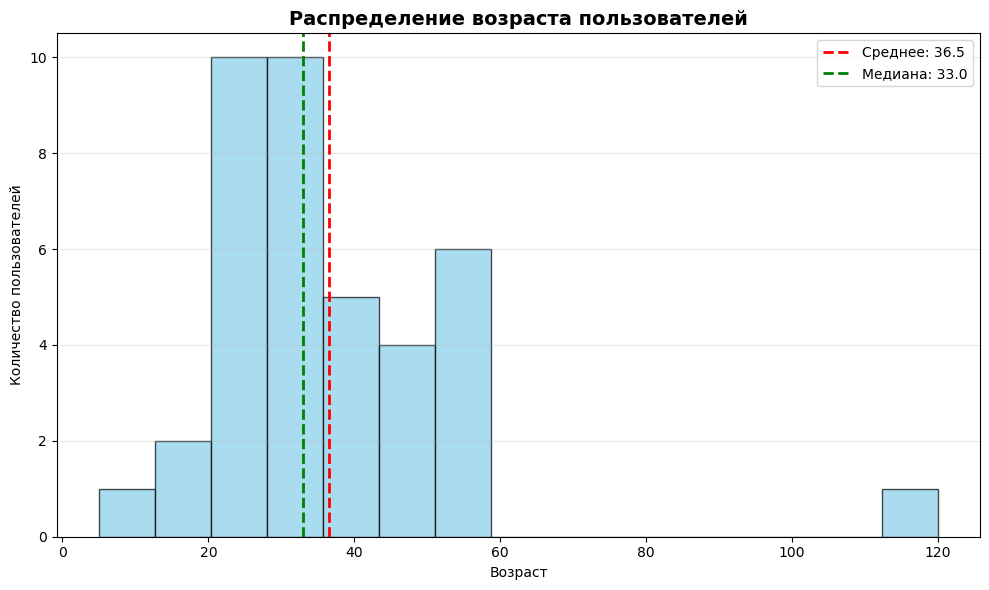

In [29]:
# Гистограмма распределения возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.3)

# Вертикальные линии для среднего и медианы
mean_age = df['age'].mean()
median_age = df['age'].median()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_age:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

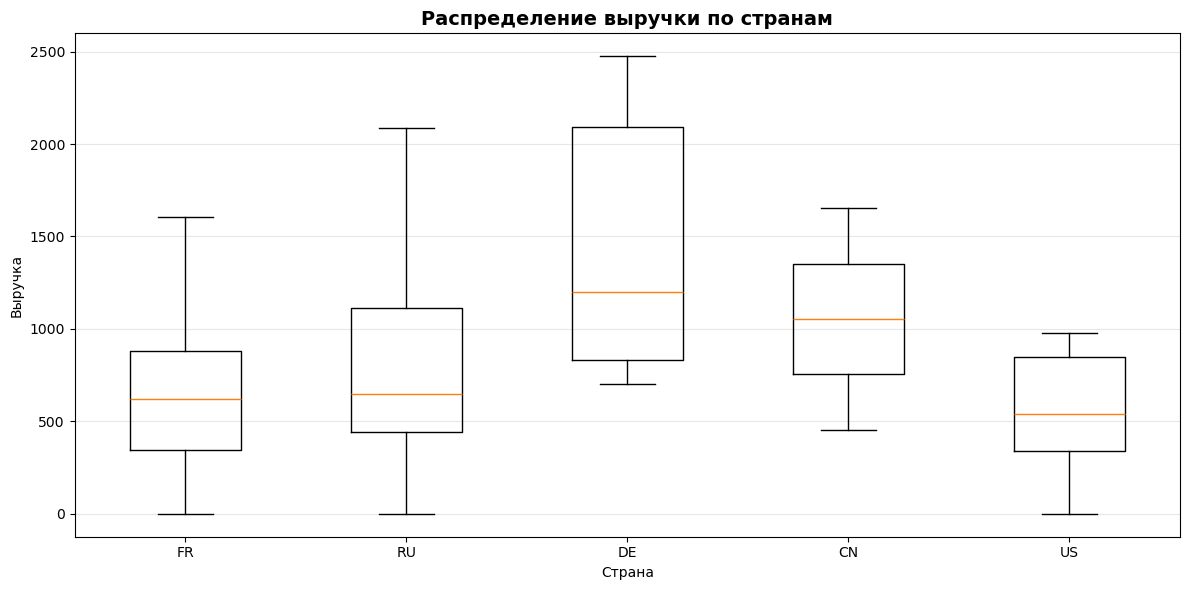

In [31]:
# Боксплот выручки по странам
plt.figure(figsize=(12, 6))

# Создаем данные для боксплота по странам
data_to_plot = [df[df['country'] == country]['revenue'].values for country in df['country'].unique()]

plt.boxplot(data_to_plot, tick_labels=df['country'].unique())
plt.title('Распределение выручки по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

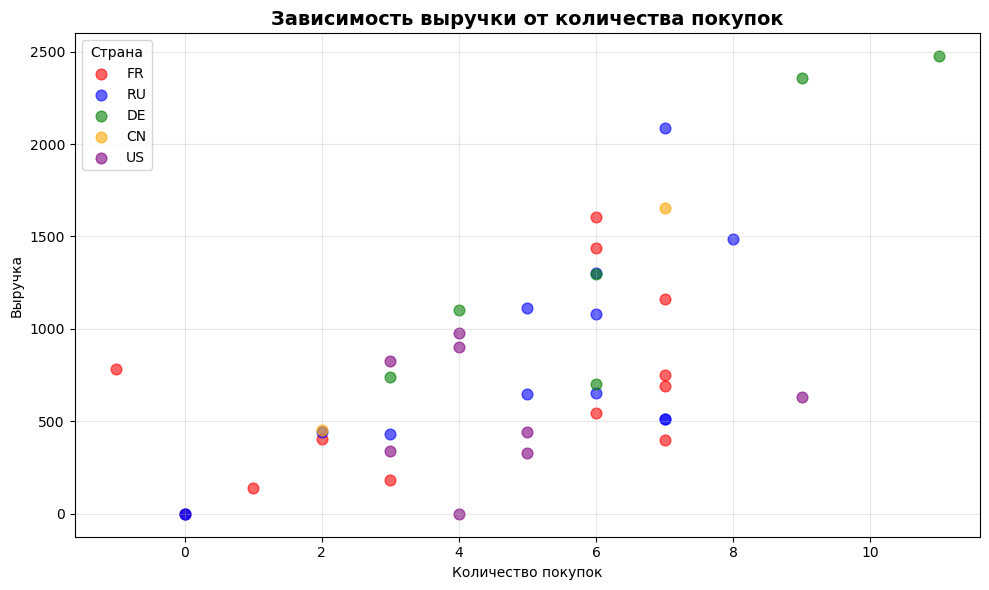

In [32]:
# Диаграмма рассеяния (scatter plot)
plt.figure(figsize=(10, 6))

# Создаем scatter plot с цветовым кодированием по странам
countries = df['country'].unique()
colors = ['red', 'blue', 'green', 'orange', 'purple']

for country, color in zip(countries, colors):
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'],
               alpha=0.6, label=country, color=color, s=60)

plt.title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.legend(title='Страна')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

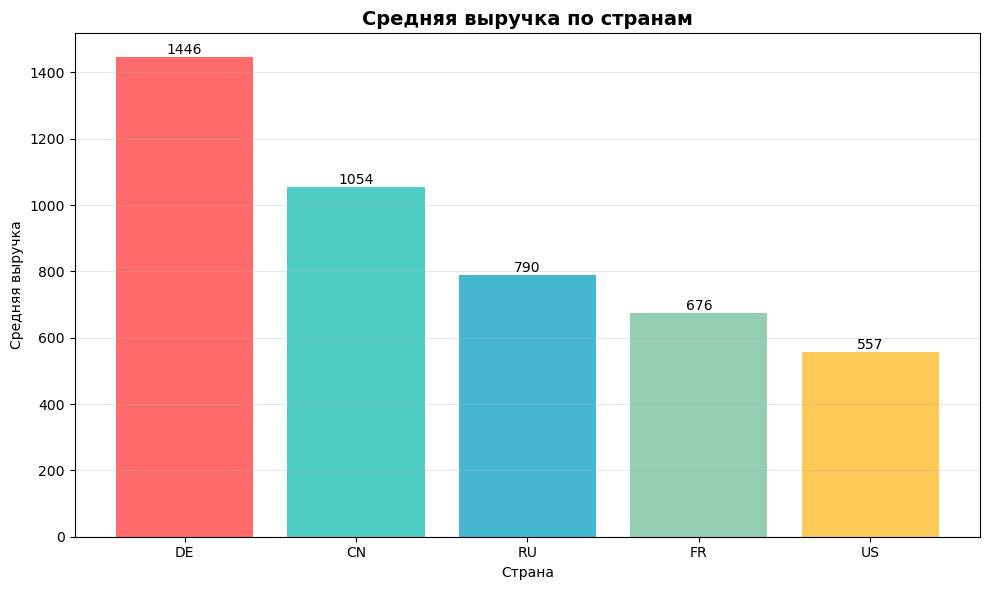

In [33]:
# Дополнительный график - средняя выручка по странам
plt.figure(figsize=(10, 6))

# Группируем по странам и считаем среднюю выручку
avg_revenue_by_country = df.groupby('country')['revenue'].mean().sort_values(ascending=False)

bars = plt.bar(avg_revenue_by_country.index, avg_revenue_by_country.values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])

plt.title('Средняя выручка по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Средняя выручка')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()